In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import  GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score



READING THE CSV FILE FROM ITS LOCATION TO GIVE A PANDAS DATAFRAME

In [2]:
data=pd.read_csv(r"C:\Users\USER\Desktop\pension_fund_data_tanzania.csv" ,index_col=0)
data.head(10)


,age,service_years,salary,pensionable_earnings,marital_status,number_of_dependents,retirement_age,expected_retirement_benefits,employee_contribution_rate,employer_contribution_rate,...,promoted_in_last_5_years,termination_reason,employer_industry,job_level,union_membership,reemployment_status,reemployment_salary,benefit_indexation,deferred_status_date,benefit_option_at_retirement
member_id,,,,,,,,,,,,,,,,,,,,,
ID0000001O,31.0,12.0,180296.07,87768.89,Married,4,61,38277.90,12.23,19.78,...,Yes,Retirement,Healthcare,Senior,Yes,Unemployed,0.00,Yes,1997-10-07,Lump Sum
ID0000002S,30.0,0.0,178031.72,61689.59,Single,3,70,36502.89,9.74,22.37,...,Yes,Resignation,Technology,Executive,No,Unemployed,0.00,Yes,1990-07-12,Lump Sum
ID0000003N,60.0,45.0,39898.64,104294.78,Single,6,56,47529.29,12.29,13.08,...,Yes,Death,Manufacturing,Executive,Yes,Employed,83116.93,No,2020-09-07,Annuity
ID0000004C,18.0,NaN,80541.01,143889.43,Divorced,3,55,22315.77,19.75,12.43,...,Yes,Death,Education,Mid,Yes,Employed,76092.35,No,2003-07-21,Lump Sum
ID0000005J,39.0,9.0,138106.63,77188.38,Widowed,1,61,34357.79,12.86,19.60,...,No,Death,Healthcare,Senior,Yes,Unemployed,0.00,No,2007-04-07,Annuity
ID0000006R,65.0,40.0,189245.95,115518.83,Married,8,57,10905.13,12.02,11.64,...,Yes,Resignation,Healthcare,Mid,Yes,Unemployed,0.00,No,1997-01-21,Lump Sum
ID0000007V,53.0,20.0,NaN,123128.25,Widowed,8,68,13071.81,12.08,18.21,...,Yes,Death,Finance,Executive,No,Unemployed,0.00,No,2001-05-07,Lump Sum
ID0000008K,65.0,17.0,59764.55,109754.47,Single,4,67,34843.44,19.95,12.53,...,No,Death,Education,Senior,Yes,Unemployed,0.00,No,1996-07-19,Lump Sum
ID0000009E,26.0,15.0,164525.92,111189.04,Single,10,57,7709.40,9.72,24.88,...,Yes,Retirement,Healthcare,Senior,No,Unemployed,0.00,Yes,1995-08-15,Combination


CHECKING SPECIFIC NUMERICAL VARIABLES WITH MISSING DATA VALUES AND THEIR SUM

In [3]:
data.isnull().sum()

age                             52428
service_years                   52428
salary                          52428
pensionable_earnings                0
marital_status                      0
                                ...  
reemployment_status                 0
reemployment_salary                 0
benefit_indexation                  0
deferred_status_date                0
benefit_option_at_retirement        0
Length: 66, dtype: int64

CHECKING FOR MISSING DATA PERCENTAGES

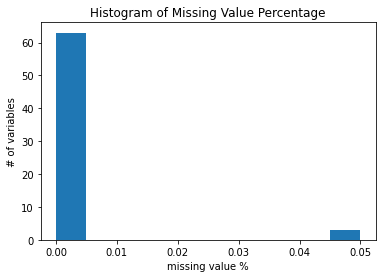

In [21]:

missing_data_perc = data.isna().sum()/(len(data))
missing_data_perc[missing_data_perc>0]
fig = plt.figure()
plt.hist(missing_data_perc, bins = 10)
plt.title("Histogram of Missing Value Percentage")
plt.xlabel("missing value %")
plt.ylabel("# of variables")
plt.show()

DROPPING THE ROWS NULL VALUES

In [30]:
data.dropna(inplace=True)
data.shape

(898935, 69)

DATA SELECETION


SAMLPLE HISTOGRAMS SHOWING THE DISTRIBUTION OF SEVERAL VARIABLES

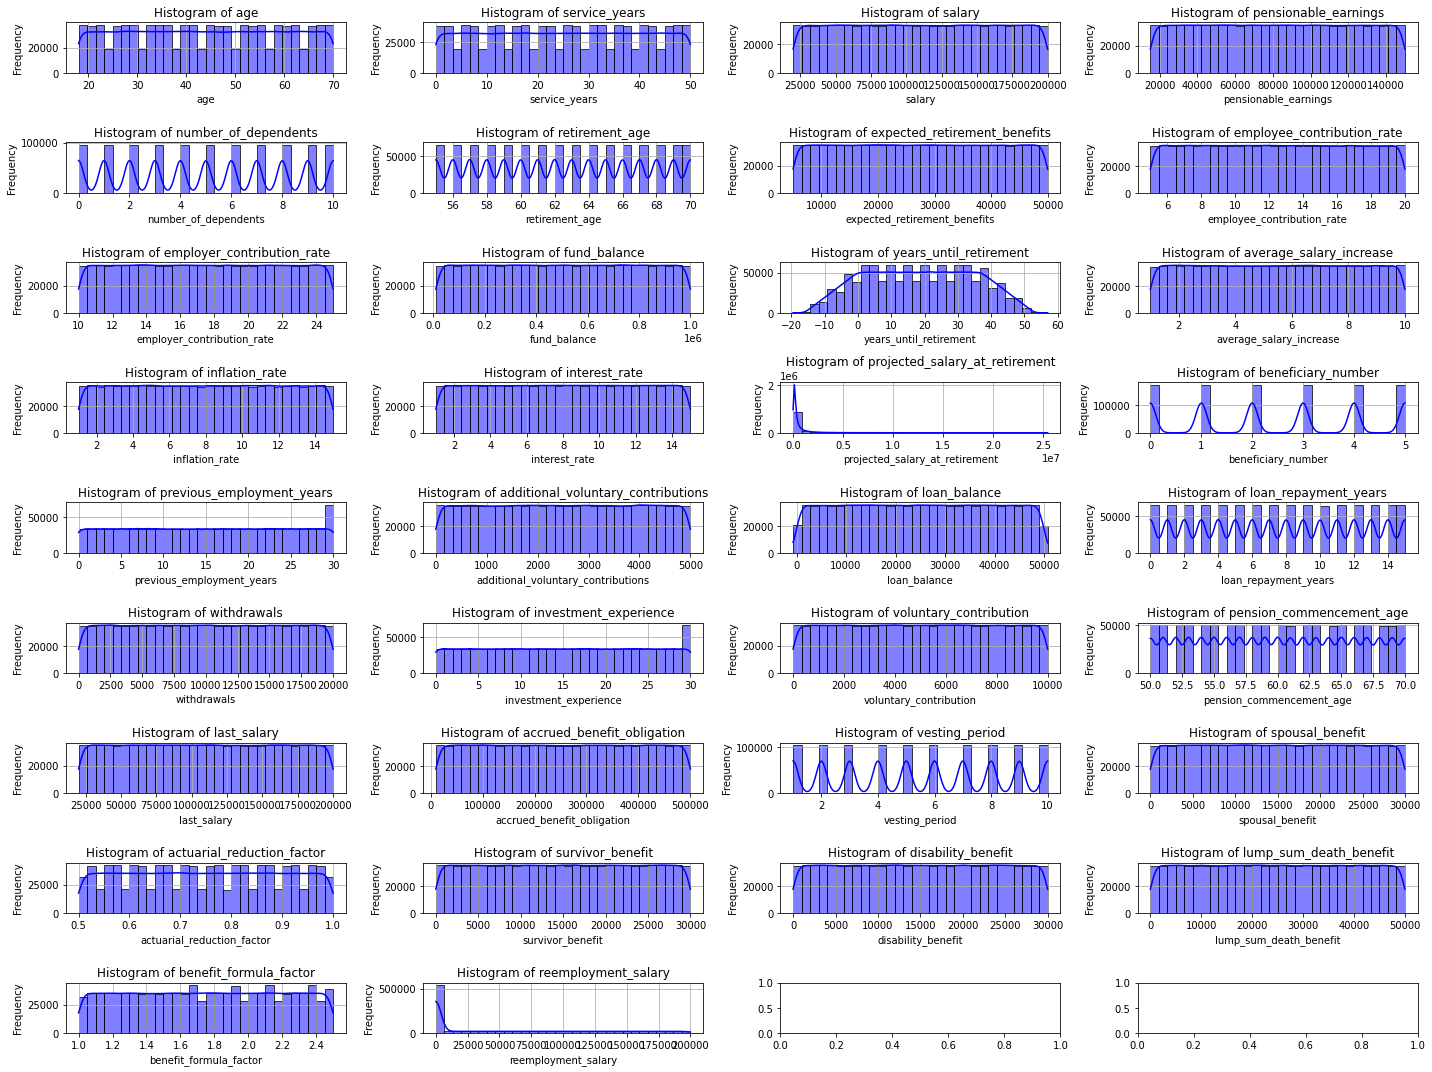

In [6]:

numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns


n_cols = 4  
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols 
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 15))
axes = axes.flatten()
for i, column in enumerate(numerical_columns):
    sns.histplot(data[column], kde=True, color='blue', bins=30, ax=axes[i])
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')
    axes[i].grid(True)

plt.tight_layout()
plt.show()

Descriptive statistics for Numerical variables

In [14]:

numerical_columns = data.select_dtypes(include=['float64', 'int64'])
numerical_columns.describe()

,age,service_years,salary,pensionable_earnings,number_of_dependents,retirement_age,expected_retirement_benefits,employee_contribution_rate,employer_contribution_rate,fund_balance,...,last_salary,accrued_benefit_obligation,vesting_period,spousal_benefit,actuarial_reduction_factor,survivor_benefit,disability_benefit,lump_sum_death_benefit,benefit_formula_factor,reemployment_salary
count,996148.000000,996148.000000,996148.000000,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,...,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06,1.048576e+06
mean,44.002072,25.021484,110006.676444,8.246076e+04,4.992493e+00,6.249714e+01,2.749598e+04,1.249214e+01,1.749712e+01,5.048861e+05,...,1.099594e+05,2.549441e+05,5.496607e+00,1.499496e+04,7.499361e-01,1.500087e+04,1.499727e+04,2.499562e+04,1.750171e+00,5.000063e+04
std,15.300088,14.723197,51975.319958,3.895259e+04,3.161350e+00,4.607651e+00,1.299002e+04,4.331209e+00,4.330375e+00,2.857932e+05,...,5.196789e+04,1.415697e+05,2.870442e+00,8.654855e+03,1.443260e-01,8.661968e+03,8.656261e+03,1.443351e+04,4.331584e-01,6.449322e+04
min,18.000000,0.000000,20000.040000,1.500003e+04,0.000000e+00,5.500000e+01,5.000010e+03,5.000000e+00,1.000000e+01,1.000003e+04,...,2.000007e+04,1.000026e+04,1.000000e+00,9.000000e-02,5.000000e-01,1.000000e-02,0.000000e+00,1.000000e-02,1.000000e+00,0.000000e+00
25%,31.000000,12.000000,64952.792500,4.875257e+04,2.000000e+00,5.800000e+01,1.626247e+04,8.740000e+00,1.375000e+01,2.571998e+05,...,6.499617e+04,1.321322e+05,3.000000e+00,7.502507e+03,6.200000e-01,7.500033e+03,7.504413e+03,1.249892e+04,1.370000e+00,0.000000e+00
50%,44.000000,25.000000,109962.300000,8.244955e+04,5.000000e+00,6.200000e+01,2.749040e+04,1.249000e+01,1.749000e+01,5.049490e+05,...,1.099081e+05,2.549259e+05,5.000000e+00,1.498424e+04,7.500000e-01,1.500426e+04,1.498699e+04,2.498728e+04,1.750000e+00,1.219700e+02
75%,57.000000,38.000000,155066.362500,1.161763e+05,8.000000e+00,6.600000e+01,3.874679e+04,1.624000e+01,2.125000e+01,7.523138e+05,...,1.550406e+05,3.776484e+05,8.000000e+00,2.248501e+04,8.700000e-01,2.249728e+04,2.249456e+04,3.750153e+04,2.130000e+00,9.996499e+04
max,70.000000,50.000000,199999.700000,1.500000e+05,1.000000e+01,7.000000e+01,4.999998e+04,2.000000e+01,2.500000e+01,9.999999e+05,...,2.000000e+05,4.999997e+05,1.000000e+01,2.999998e+04,1.000000e+00,2.999999e+04,2.999997e+04,4.999996e+04,2.500000e+00,1.999997e+05


Descriptive statistics for Categorical variables

In [19]:
data.describe(include=['object', 'bool'])

,marital_status,health_status,employment_status,gender,job_title,sector,location,education_level,disability_status,ethnicity,...,member_status,promoted_in_last_5_years,termination_reason,employer_industry,job_level,union_membership,reemployment_status,benefit_indexation,deferred_status_date,benefit_option_at_retirement
count,1048576,1048576,1048576,1048576,1048576,1048576,1048576,1048576,1048576,1048576,...,1048576,1048576,1048576,1048576,1048576,1048576,1048576,1048576,1048576,1048576
unique,4,4,3,2,5,2,4,5,3,4,...,4,2,4,5,4,2,2,2,12054,3
top,Divorced,Excellent,Active,Male,Manager,Private,Kinondoni,Primary,Permanent,Black African,...,Inactive,No,Death,Finance,Mid,No,Employed,No,1999-08-10,Annuity
freq,262648,262461,349787,524877,210123,524703,262560,210364,350265,943718,...,262726,524607,262491,210345,262476,524305,524589,524561,134,350171


TRENDS

In [22]:
# Convert the 'deferred_status_date' column to Date type
data['deferred_status_date'] = pd.to_datetime(data['deferred_status_date'], format='%Y-%m-%d')

# Extract the year from the 'deferred_status_date' column
data['Year'] = data['deferred_status_date'].dt.year

# Group data by year and calculate mean and standard deviation of CPI (inflation_rate)
yearly_stats_CPI = data.groupby('Year').agg(
    Mean_CPI=('inflation_rate', 'mean'),
    SD_CPI=('inflation_rate', 'std')
).reset_index()

# Display the result
yearly_stats_CPI.head(10)


,Year,Mean_CPI,SD_CPI
0,1990,7.969058,4.029745
1,1991,7.985175,4.046303
2,1992,8.000537,4.055500
3,1993,8.000857,4.037693
4,1994,8.002621,4.038297
5,1995,8.021192,4.054004
6,1996,7.996827,4.031397
7,1997,8.012071,4.052234
8,1998,7.994782,4.043242
9,1999,8.006420,4.045608


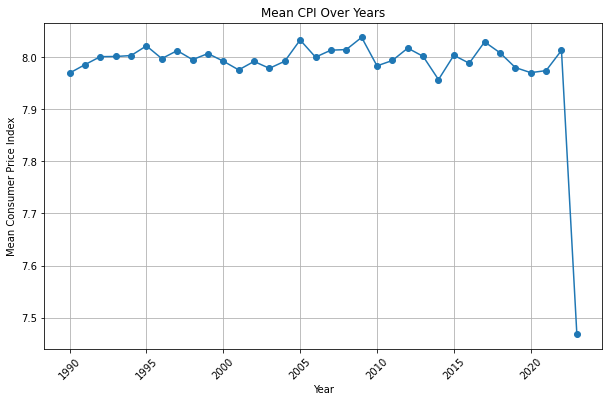

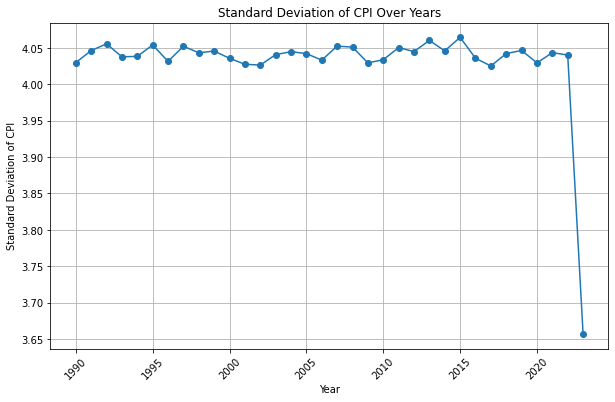

In [23]:

# Plotting mean year CPI
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats_CPI['Year'], yearly_stats_CPI['Mean_CPI'], marker='o', linestyle='-')
plt.title('Mean CPI Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Consumer Price Index')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting standard deviation of CPI
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats_CPI['Year'], yearly_stats_CPI['SD_CPI'], marker='o', linestyle='-')
plt.title('Standard Deviation of CPI Over Years')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of CPI')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


TRENDS IN INTEREST RATES

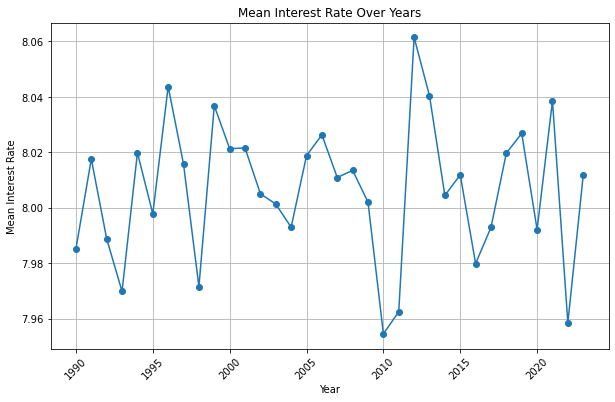

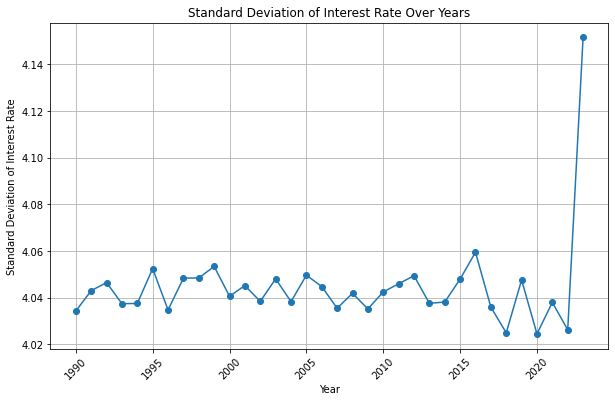

In [24]:

# Group data by year and calculate mean and standard deviation of interest rate
yearly_stats_interest_rate = data.groupby('Year').agg(
    Mean_interest_rate=('interest_rate', 'mean'),
    SD_interest_rate=('interest_rate', 'std')
).reset_index()

# Display the result
yearly_stats_interest_rate.head()

# Plotting mean interest rate over years
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats_interest_rate['Year'], yearly_stats_interest_rate['Mean_interest_rate'], marker='o', linestyle='-')
plt.title('Mean Interest Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Mean Interest Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Plotting standard deviation of interest rate over years
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats_interest_rate['Year'], yearly_stats_interest_rate['SD_interest_rate'], marker='o', linestyle='-')
plt.title('Standard Deviation of Interest Rate Over Years')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Interest Rate')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



BOX PLOT

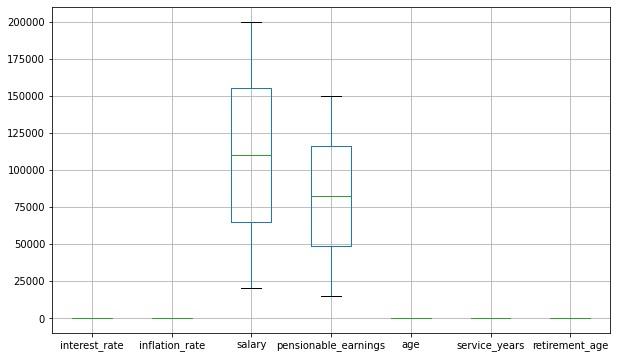

In [9]:

import matplotlib.pyplot as plt
numerical = data[['interest_rate','inflation_rate','salary','pensionable_earnings','age','service_years','retirement_age']]
plt.figure(figsize=(10,6))

numerical.boxplot()
plt.show()

Computing Correlation between Variables

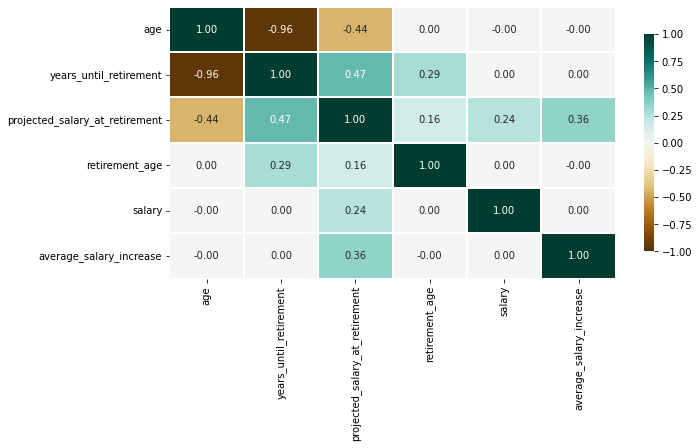

In [11]:
correlation_matrix = data[['age','years_until_retirement','projected_salary_at_retirement','retirement_age','salary','average_salary_increase']].corr()

fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True,fmt='.2f', cmap='BrBG',
           linewidth=0.3, cbar_kws={"shrink": .8})
plt.show()


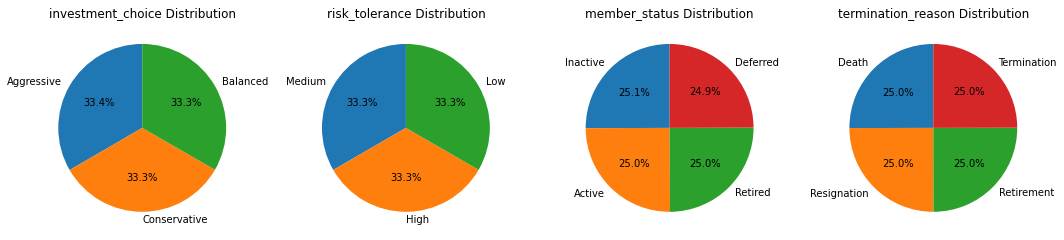

In [15]:
categorical_columns=['investment_choice','risk_tolerance','member_status','termination_reason']
fig,axes=plt.subplots(nmembers=1, ncols=len(categorical_columns), figsize=(15,5))
for i, column in enumerate(categorical_columns):
    category=data[column].value_counts()
    axes[i].pie(category,labels=category.index, autopct='%1.1f%%', startangle=90)
    axes[i].set_title(f'{column} Distribution')

plt.tight_layout()
plt.show()

PREDICTIVE MACHINE LEARNING MODEL

LINEAR REGRESSION

In [32]:

features = ['benefit_formula_factor', 'interest_rate',
            'inflation_rate','employment_status', 'investment_choice','risk_tolerance','employer_contribution_rate','employee_contribution_rate']
target = 'fund_balance'  # Fund balance' is the target variable


X = data[features]
y = data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Standardization and Normalization
numeric_features = ['benefit_formula_factor', 'interest_rate','inflation_rate','employer_contribution_rate','employee_contribution_rate']
numeric_transformer = StandardScaler()

categorical_features = ['investment_choice','employment_status','risk_tolerance']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# General Linear Model
from sklearn.linear_model import LinearRegression

model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Model fitting
model.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error, r2_score

# Prediction and testing accuracy of the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'mean_squared_error: {mse}')
print(f'R-squared: {r2}')


mean_squared_error: 81759405511.06415
R-squared: -5.804549727317365e-05


GRADIENT BOOSTING REGRESSOR

Feature importance: [0.1544894  0.18975063 0.22882925 0.21932854 0.20760219]
RMSE: 489087.00
Variance score: -1.926865


(-49999.24450000001, 1049988.5345, -46299.30662950214, 972289.8392195449)

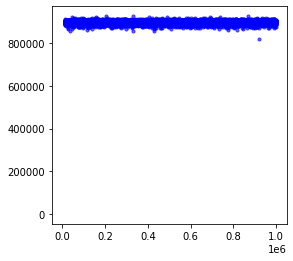

In [10]:
features = ['benefit_formula_factor', 'interest_rate',
            'inflation_rate','employer_contribution_rate','employee_contribution_rate']
target = 'fund_balance'  # Fund balance' is the target variable

#training and validation data split
train, test = train_test_split(data, test_size=0.1, random_state=123)

#GBM
gbm = GradientBoostingRegressor(loss='quantile', n_estimators=1000, max_depth=6, random_state = 123,
                                learning_rate=.005, min_samples_leaf=3, min_samples_split=6,max_features="sqrt",tol=1e-6)#"sqrt")

# Train the model using the training sets
gbm.fit(train[features], train['fund_balance'].values.ravel())

# Make predictions using the testing set
y_pred = gbm.predict(test[features])

# The coefficients
print('Feature importance:', gbm.feature_importances_)
# The mean squared error
print("RMSE: %.2f"
      % mean_squared_error(test['fund_balance'], y_pred)**0.5)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.6f' % r2_score(test['fund_balance'], y_pred))

x = np.linspace(0.2,2)
y = x
plt.plot(x, y, '--')
plt.scatter(test['fund_balance'], y_pred, c='blue', s=10, alpha=0.6)
plt.ylim([0.2, 2])
plt.xlim([0.2, 2])
plt.axis('scaled')


In [3]:
# Calculate expected benefit based on pension type
def calculate_expected_benefit(member):
    interest_rate = np.random.normal(member['interest_rate']/100, 0.01**2)
    if member['pension_plan_type'] == 'Defined Benefit':
        if member['employment_status'] == 'Active':

            if pd.notnull(member['benefit_formula_factor']):
                return (member['benefit_formula_factor']/100) * (member['years_until_retirement']+member['service_years']) \
                    * member['projected_salary_at_retirement']*12
            else:
                return None
        elif member['employment_status'] == 'Deferred':

            if pd.notnull(member['benefit_formula_factor']):
                return (member['benefit_formula_factor']/100)*12* member['service_years'] * member['last_salary']\
                    *(1+member['inflation_rate']/100)**(member['years_until_retirement'])
            else:
                return None 
        elif member['employment_status'] == 'Retired':

            if pd.notnull(member['benefit_formula_factor']):
                return ((member['benefit_formula_factor']/100) *12* member['service_years']\
                        * member['projected_salary_at_retirement'])\
                +((member['benefit_formula_factor']/100) *12* member['years_until_retirement']\
                  * member['projected_salary_at_retirement'])
            else:
                return None   
        
    elif member['pension_plan_type'] == 'Defined Contribution':
        if member['employment_status'] == 'Active':
            if pd.notnull(member['last_salary']):
               return member['last_salary']*(member['years_until_retirement']+member['service_years'])\
                *((member['employer_contribution_rate']+member['employee_contribution_rate'])/100)*\
                    (1+member['interest_rate']/100)*(1+member['inflation_rate']/100)**(member['years_until_retirement'])
            else:
                return None
        elif member['employment_status'] == 'Deferred':
            if pd.notnull(member['last_salary']):
                return  member['last_salary']*(member['service_years'])*((member['employer_contribution_rate']\
                                                                          +member['employee_contribution_rate'])/100)\
                    *(1+member['interest_rate']/100)
        elif member['employment_status'] == 'Retired':
            if pd.notnull(member['last_salary']):
                return  (member['last_salary']*(member['service_years'])*((member['employer_contribution_rate']+\
                                                                           member['employee_contribution_rate'])/100)\
                         *(1+member['interest_rate']/100))+(member['last_salary']*(member['years_until_retirement'])\
                                                            *((member['employer_contribution_rate']+member['employee_contribution_rate'])/100)*\
                                                                (1+member['interest_rate']/100))
    elif member['pension_plan_type'] == 'Hybrid':
        if member['employment_status'] == 'Active':
            if pd.notnull(member['last_salary']):
               return (member['last_salary']*(member['years_until_retirement']+member['service_years'])\
                       *((member['employer_contribution_rate']+member['employee_contribution_rate'])/100)\
                        *(1+member['interest_rate']/100)*(1+member['inflation_rate']/100)**(member['years_until_retirement']))\
                            *0.5+((member['benefit_formula_factor']/100)*12* (member['years_until_retirement']+member['service_years']) \
                                  * member['projected_salary_at_retirement'])*0.5
            else:
                return None
        elif member['employment_status'] == 'Deferred':
            if pd.notnull(member['last_salary']):
                return  (member['last_salary']*(member['service_years'])*((member['employer_contribution_rate']\
                                                                           +member['employee_contribution_rate'])/100)\
                         *(1+member['interest_rate']/100))*0.5+((member['benefit_formula_factor']/100)*12* member['service_years'] \
                                                                * member['last_salary']*(1+member['inflation_rate']/100)\
                                                                    **(member['years_until_retirement']))*0.5
        elif member['employment_status'] == 'Retired':
            if pd.notnull(member['last_salary']):
                return  (member['last_salary']*(member['service_years'])*((member['employer_contribution_rate']\
                                                                           +member['employee_contribution_rate'])/100)\
                         *(1+member['interest_rate']/100))+(member['last_salary']*(member['years_until_retirement'])\
                                                            *((member['employer_contribution_rate']+member['employee_contribution_rate'])/100)\
                                                                *(1+member['interest_rate']/100))*0.5+((member['benefit_formula_factor']/100)*12* \
                                member['service_years'] * member['projected_salary_at_retirement'])+((member['benefit_formula_factor']/100)*12 \
                                                                * member['years_until_retirement'] * member['projected_salary_at_retirement'])*0.5

        return 
    else:
        return "Unknown pension type"


        

data['expected_benefit'] = data.apply(calculate_expected_benefit, axis=1)

print(data[[ 'expected_benefit']])


#  calculate discounted expected benefit
def calculate_discounted_benefit(datas):
    interest_rate = np.random.normal(datas['interest_rate']/100, 0.01**2)
    return datas['expected_benefit'] / ((1 + interest_rate) ** datas['years_until_retirement'])

# Apply the function to each row to create a new column 'discounted_expected_benefit'
data['discounted_expected_benefit'] = data.apply(calculate_discounted_benefit, axis=1)

# Display the updated DataFrame with the new column

funding_ratio=data['fund_balance'].sum()/data['discounted_expected_benefit'].sum()

print('FUNDING RATIO',funding_ratio)





            expected_benefit
member_id                   
ID0000001O      2.350041e+06
ID0000002S      1.614798e+07
ID0000003N      6.151121e+05
ID0000004C               NaN
ID0000005J      2.548310e+06
...                      ...
ID1048572F      1.219530e+06
ID1048573N      1.901661e+06
ID1048574X      4.683035e+06
ID1048575I      7.113292e+06
ID1048576Z      4.784717e+05

[1048576 rows x 1 columns]
FUNDING RATIO 0.2875253149741431


In [4]:
print(data[[ 'expected_benefit']].sum())
print(data[[ 'expected_benefit']].isnull().sum())

expected_benefit    1.158236e+13
dtype: float64
expected_benefit    52428
dtype: int64


In [5]:
print(data['expected_benefit'].fillna(0, inplace=True))


None


In [6]:
DB_total=0
DC_total=0
Hybrid_total=0
for index, row in data.iterrows():
    if row['pension_plan_type']=='Defined Benefit':
            DB_total+=row['expected_benefit']
    elif row['pension_plan_type']=='Defined Contribution':
            DC_total+=row['expected_benefit']
    elif row['pension_plan_type']=='Hybrid':
            Hybrid_total+=row['expected_benefit']
    
print('DB_total',DB_total )
print('DC_total',DC_total )
print('hybrid_total',Hybrid_total )

DB_total 2738721628072.8984
DC_total 4875549050160.61
hybrid_total 3968090969918.2456


predicting fund balance in 10 years

In [7]:

def predict_member_balance(member, years):
    """
    Calculate the future fund balance for a member in a DataFrame.
   
    Args:
    member (pd.Series): A member from a DataFrame containing the needed data.
    years (int): Number of years to project the balance.

    Returns:
    float: Projected fund balance after the specified number of years.
    """
    if member['employment_status'] == 'Active':
        if member['pension_plan_type']== 'Defined Benefit':
            current_balance = member['fund_balance']
            annual_contribution = member['last_salary']*(1+(member['employee_contribution_rate']/100+member['employer_contribution_rate']/100))
            salary_increase=member['average_salary_increase']/100
   
            future_balance = current_balance
            adjusted_contribution = annual_contribution
   
            for year in range(1, years + 1):
                adjusted_contribution *= (1+salary_increase)
                future_balance = future_balance  + adjusted_contribution
   
            return future_balance

        elif member['pension_plan_type']== 'Defined Contribution':
            current_balance = member['fund_balance']
            annual_contribution = member['last_salary']*(member['employee_contribution_rate']/100+member['employer_contribution_rate']/100)
            annual_return = np.random.normal(member['interest_rate']/100, 0.01**2)
            annual_inflation = member.get('inflation_rate')/100
            salary_increase=member['average_salary_increase']/100
   
            future_balance = current_balance
            adjusted_contribution = annual_contribution
   
            for year in range(1, years + 1):
                adjusted_contribution *= ((1 + annual_return)/(1+annual_inflation))
                future_balance = future_balance * (1 + annual_return) + adjusted_contribution*(1+salary_increase)
   
            return future_balance
    
        elif member['pension_plan_type']== 'Hybrid':
            current_balance = member['fund_balance']
            annual_contribution = member['last_salary']*(member['employee_contribution_rate']/100+member['employer_contribution_rate']/100)
            annual_return = np.random.normal(member['interest_rate']/100, 0.01**2)
            annual_inflation = member.get('inflation_rate')/100
            salary_increase=member['average_salary_increase']
   
            future_balance = current_balance
            adjusted_contribution = annual_contribution
   
            for year in range(1, years + 1):
                adjusted_contribution *= ((1 + annual_return)/(1+annual_inflation))
                future_balance = future_balance * (1 + annual_return) + adjusted_contribution
   
            return future_balance
    else:
        return member['fund_balance']

data['predicted_fund_balance'] = data.apply(predict_member_balance, years=10, axis=1)
print(data['predicted_fund_balance'])

member_id
ID0000001O    8.781764e+05
ID0000002S    1.013366e+06
ID0000003N    3.967735e+05
ID0000004C    2.173892e+06
ID0000005J    4.112729e+05
                  ...     
ID1048572F    1.741928e+04
ID1048573N    3.769937e+05
ID1048574X    3.627274e+06
ID1048575I    3.393292e+05
ID1048576Z    1.776928e+05
Name: predicted_fund_balance, Length: 1048576, dtype: float64


In [8]:
print(data['predicted_fund_balance'].sum())
print(data['fund_balance'].sum())

1036445385603.2507
529411431664.3002


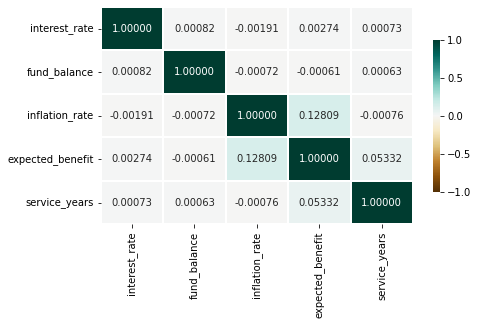

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

features = data[['interest_rate','fund_balance','inflation_rate','expected_benefit','service_years']]
correlation_matrix = features.corr()
fig, ax = plt.subplots(figsize=(7, 4))
sns.heatmap(correlation_matrix, vmin=-1, vmax=1, annot=True,fmt='.5f', cmap='BrBG',
           linewidth=0.1, cbar_kws={"shrink": .7})
plt.show()


C:\Users\USER\AppData\Local\Temp\ipykernel_9576\1352791963.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_subset['Risk_Category'] = data_subset.apply(lambda x: categorize_risk(x['salary'], x['loan_balance']), axis=1)
c:\Users\USER\AppData\Local\Programs\Python\Python310\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


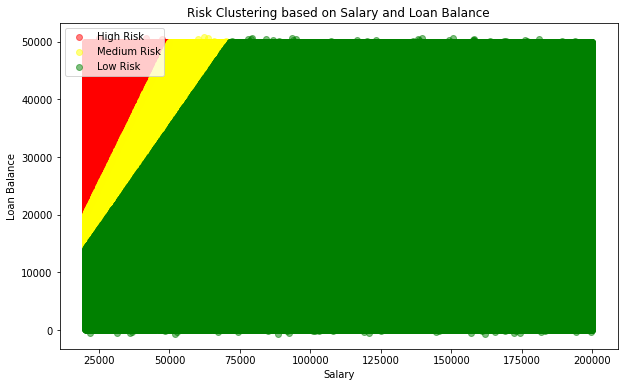

In [17]:

# Sub-setting the data for easy cluster analysis
data_subset = data[['salary', 'loan_balance']]

# Assigning risk categories based on specified criteria
def categorize_risk(salary, loan_balance):
    if loan_balance>salary :
        return 'High Risk'
    elif (salary-loan_balance) /salary <= 0.3:
        return 'Medium Risk'
    else:
        return 'Low Risk'

data_subset['Risk_Category'] = data_subset.apply(lambda x: categorize_risk(x['salary'], x['loan_balance']), axis=1)



# Visualizing the distribution of risk categories
colors = {'High Risk': 'red', 'Medium Risk': 'yellow', 'Low Risk': 'green'}
plt.figure(figsize=(10, 6))

for category, color in colors.items():
    subset = data_subset[data_subset['Risk_Category'] == category]
    plt.scatter(subset['salary'], subset['loan_balance'], c=color, label=category, alpha=0.5)

plt.title('Risk Clustering based on Salary and Loan Balance')
plt.xlabel('Salary')
plt.ylabel('Loan Balance')
plt.legend()
plt.show()



In [18]:
# Checking the distribution of the new risk categories
cluster_table = data_subset.groupby('Risk_Category').agg(
    Average_salary=('salary', 'mean'),
    Average_loan_balance=('loan_balance', 'mean'),
    N=('Risk_Category', 'size')
).reset_index()

cluster_table['Percentage'] = (cluster_table['N'] / cluster_table['N'].sum()) * 100

cluster_table.head()


,Risk_Category,Average_salary,Average_loan_balance,N,Percentage
0,High Risk,29945.899608,39944.371064,49761,4.745579
1,Low Risk,118350.455245,23591.783061,946208,90.237427
2,Medium Risk,43977.473094,36172.086959,52607,5.016994
